## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice.
num_mice = len(combined_df['Mouse ID'].unique())
num_mice

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleaned_df = combined_df.groupby(["Timepoint","Mouse ID"])
cleaned_df = combined_df.drop_duplicates(["Timepoint","Mouse ID"],keep=False)
dups = cleaned_df.pivot_table(index = ['Mouse ID'], aggfunc ='size')
cleaned_df = cleaned_df.set_index("Mouse ID")
cleaned_df.index.unique()

Index(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546', 'z578',
       'j913',
       ...
       'y478', 'y601', 'y769', 'y865', 'z234', 'z314', 'z435', 'z581', 'z795',
       'z969'],
      dtype='object', name='Mouse ID', length=249)

In [41]:
grouped_mice = combined_df.groupby(["Timepoint","Mouse ID"]).count()
var = grouped_mice.loc[grouped_mice['Age_months']>1, "Sex"].reset_index()
var
mouse_ids = var['Mouse ID'].unique()
cleaner_df = combined_df.copy()
for i in mouse_ids:
    cleaner_df = combined_df.loc[combined_df['Mouse ID']!=i]
#len(combined_df['Mouse ID'].unique())

In [45]:
gender_count = combined_df.groupby(['Sex','Timepoint','Drug Regimen']).count()
gender_count

Mouse ID  Age_months  Weight (g)  \
Sex    Timepoint Drug Regimen                                     
Female 0         Capomulin           13          13          13   
                 Ceftamin            13          13          13   
                 Infubinol           12          12          12   
                 Ketapril             9           9           9   
                 Naftisol            13          13          13   
...                                 ...         ...         ...   
Male   45        Placebo              5           5           5   
                 Propriva             4           4           4   
                 Ramicane            15          15          15   
                 Stelasyn             4           4           4   
                 Zoniferol            4           4           4   

                               Tumor Volume (mm3)  Metastatic Sites  
Sex    Timepoint Drug Regimen                                        
Female 0         Capomulin                     13                13  
                 Ceftamin                      13                13  
                 Infubinol                     12                12  
                 Ketapril                       9                 9  
                 Naftisol                      13                13  
...                                           ...               ...  
Male   45        Placebo                        5                 5  
                 Propriva                       4                 4  
                 Ramicane                      15                15  
                 Stelasyn                       4                 4  
                 Zoniferol                      4                 4  

[200 rows x 5 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_ids = []
#or i in range(len(dups)):
#    if dups[i] < 10:
#        mouse_ids.append(dups.index[i])

#cleaned_df.drop(mouse_ids,  inplace=True)
#cleaned_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [7]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = len(cleaned_df.index.unique())
num_mice_cleaned

130

## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = cleaned_df.groupby(["Drug Regimen"])
mean = grouped_df["Tumor Volume (mm3)"].mean()
mean
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Drug Regimen
Capomulin    40.570499
Ceftamin     53.771982
Infubinol    55.079630
Ketapril     57.464206
Naftisol     56.110502
Placebo      56.110591
Propriva     54.776216
Ramicane     39.757189
Stelasyn     56.220632
Zoniferol    54.682545
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grouped_df.agg({"Tumor Volume (mm3)":["mean",'median','var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.570499  41.461125  25.103236  5.010313  0.345744
Ceftamin              53.771982  52.876429  41.043090  6.406488  0.561886
Infubinol             55.079630  54.675018  48.442724  6.960081  0.733657
Ketapril              57.464206  57.135995  74.829058  8.650379  0.824781
Naftisol              56.110502  55.011714  72.556662  8.518020  0.747080
Placebo               56.110591  55.534662  68.988135  8.305910  0.791937
Propriva              54.776216  53.606951  52.466725  7.243392  0.865751
Ramicane              39.757189  39.978202  24.031841  4.902228  0.346640
Stelasyn              56.220632  55.062141  66.013542  8.124872  0.774676
Zoniferol             54.682545  54.145372  49.980697  7.069703  0.597499

## Bar and Pie Charts

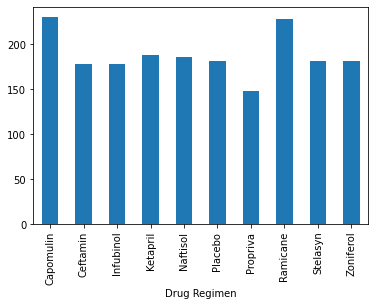

In [59]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen = cleaner_df.groupby("Drug Regimen")["Mouse ID"].count()
regimen

regimen.plot(kind="bar")
plt.show()

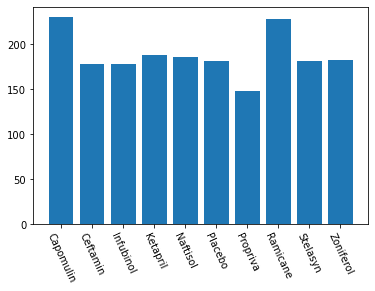

In [58]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimen.index,regimen.values)
plt.xticks(rotation = 295)
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
